In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [31]:
# 1. Define column names
cols = [
    "price", "area", "bedrooms", "bathrooms", "stories", "mainroad", 
    "guestroom", "basement", "hotwaterheating", "airconditioning", 
    "parking", "prefarea", "furnishingstatus"
]

# 2. Read CSV, skipping the first row that contains "Housing"
df = pd.read_csv("housing_prices.csv", sep=";", names=cols, skiprows=2)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [32]:
binary_cols = ["mainroad", "guestroom", "basement", 
               "hotwaterheating", "airconditioning", "prefarea"]
for col in binary_cols:
    df[col] = df[col].map({"yes": 1, "no": 0})

# 4. Convert "furnishingstatus" to numeric
#    unfurnished -> 0, semi-furnished -> 1, furnished -> 2
df["furnishingstatus"] = df["furnishingstatus"].map({
    "unfurnished": 0,
    "semi-furnished": 1,
    "furnished": 2
})

In [33]:
X = df.drop(columns=["price"])
y = df["price"]
print(X.head())
print(y.head())

   area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
0  7420         4          2        3         1          0         0   
1  8960         4          4        4         1          0         0   
2  9960         3          2        2         1          0         1   
3  7500         4          2        2         1          0         1   
4  7420         4          1        2         1          1         1   

   hotwaterheating  airconditioning  parking  prefarea  furnishingstatus  
0                0                1        2         1                 2  
1                0                1        3         0                 2  
2                0                0        2         1                 1  
3                0                1        3         1                 2  
4                0                1        2         0                 2  
0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
Name: price, dtype: int64


In [34]:
# 7. Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 8. Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# 9. Predict and evaluate
y_pred = model.predict(X_test)
print("Mean Absolute Error  :", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error   :", mean_squared_error(y_test, y_pred))
print("R² Score             :", r2_score(y_test, y_pred))

Mean Absolute Error  : 979679.6912959903
Mean Squared Error   : 1771751116594.0352
R² Score             : 0.6494754192267803


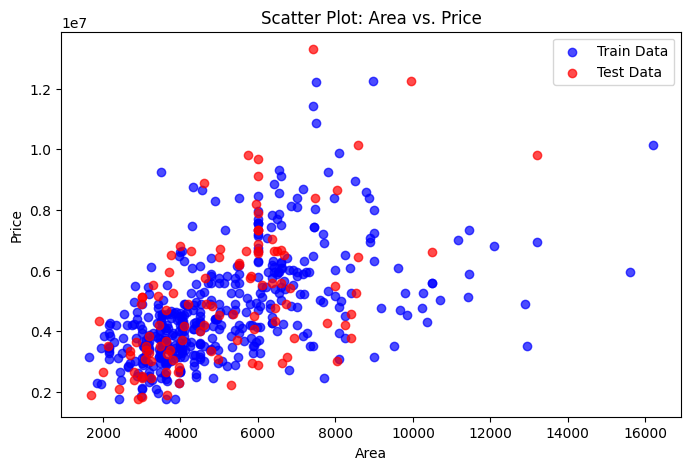

In [35]:
# 1. Plot the training data (Area vs. Price)
plt.figure(figsize=(8, 5))
plt.scatter(X_train["area"], y_train, color="blue", alpha=0.7, label="Train Data")

# 2. Plot the test data (Area vs. Price)
plt.scatter(X_test["area"], y_test, color="red", alpha=0.7, label="Test Data")

plt.title("Scatter Plot: Area vs. Price")
plt.xlabel("Area")
plt.ylabel("Price")
plt.legend()
plt.show()

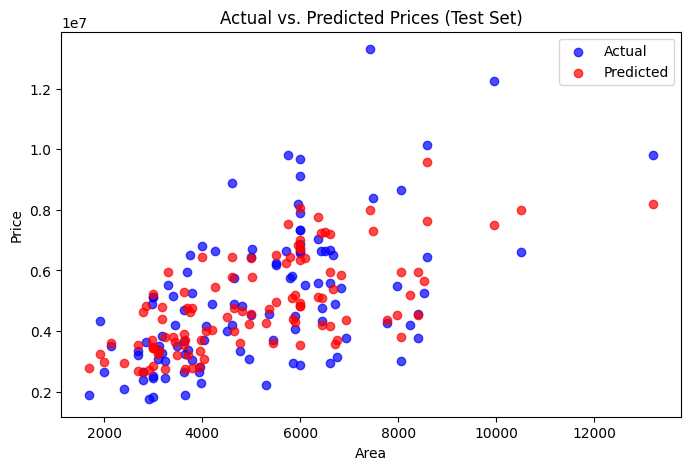

In [36]:
# Generate predictions
y_pred = model.predict(X_test)

plt.figure(figsize=(8, 5))
plt.scatter(X_test["area"], y_test, color="blue", alpha=0.7, label="Actual")
plt.scatter(X_test["area"], y_pred, color="red", alpha=0.7, label="Predicted")

plt.title("Actual vs. Predicted Prices (Test Set)")
plt.xlabel("Area")
plt.ylabel("Price")
plt.legend()
plt.show()